In [427]:
%matplotlib inline
from datetime import datetime
from math import ceil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [428]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [429]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


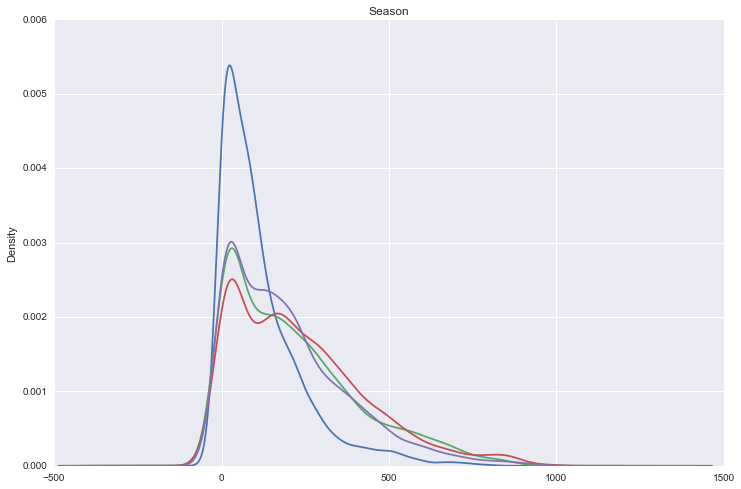

In [430]:
plt.figure(figsize=(12, 8))
plt.title('Season')
# train.season.value_counts().plot(kind='bar', rot=0)
train[train.season == 1]['count'].plot(kind='kde')
train[train.season == 2]['count'].plot(kind='kde')
train[train.season == 3]['count'].plot(kind='kde')
train[train.season == 4]['count'].plot(kind='kde')

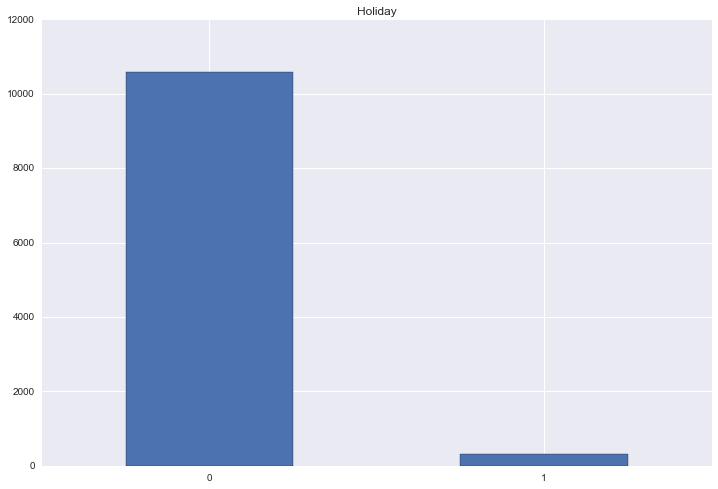

In [431]:
plt.figure(figsize=(12, 8))
plt.title('Holiday')
train.holiday.value_counts().plot(kind='bar', rot=0)

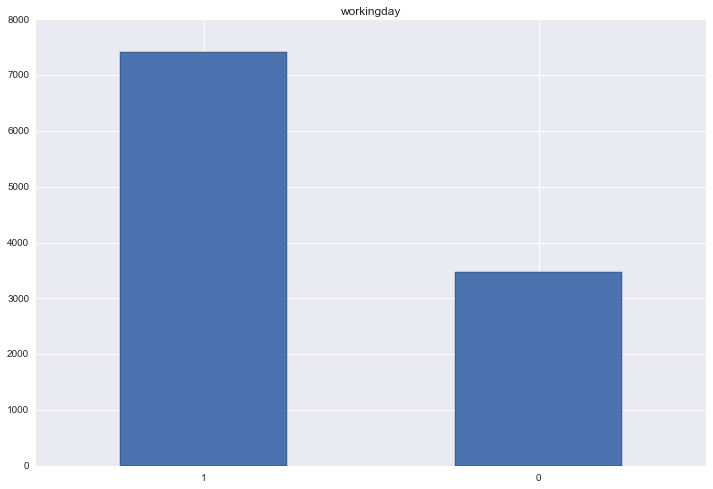

In [432]:
plt.figure(figsize=(12, 8))
plt.title('workingday')
train.workingday.value_counts().plot(kind='bar', rot=0)

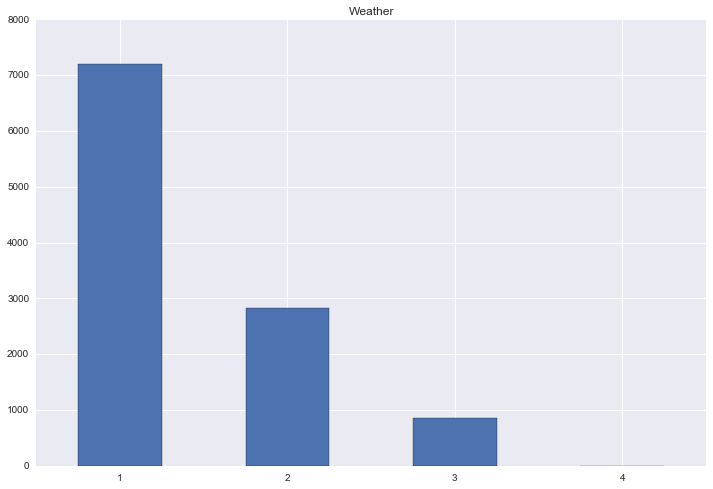

In [433]:
plt.figure(figsize=(12, 8))
plt.title('Weather')
train.weather.value_counts().plot(kind='bar', rot=0)

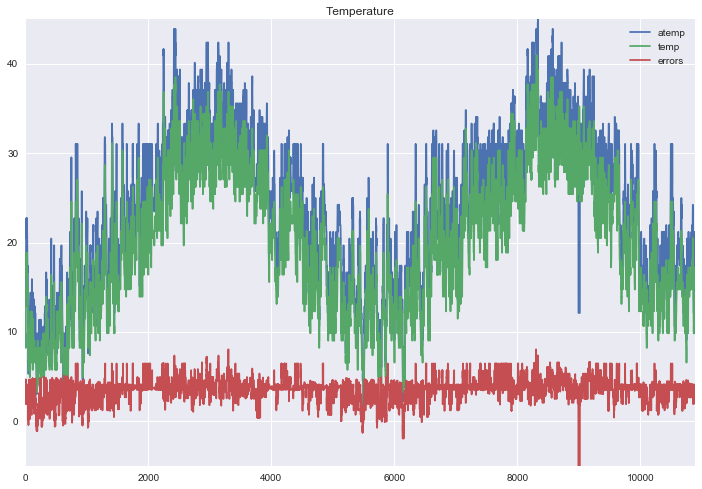

In [434]:
plt.figure(figsize=(12, 8))
plt.title('Temperature')
train.atemp.plot()
train.temp.plot()
(train.atemp - train.temp).plot()
plt.ylim((-5, 45))
plt.legend(['atemp', 'temp', 'errors'])

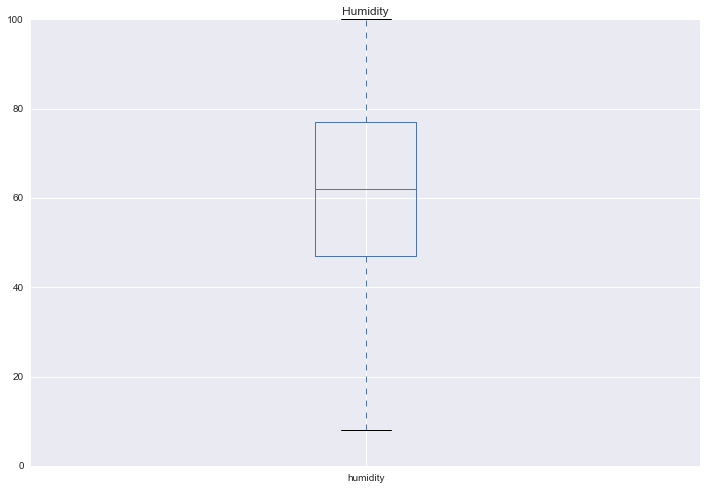

In [435]:
plt.figure(figsize=(12, 8))
plt.title('Humidity')
train.humidity.plot(kind='box')

(-1, 40)

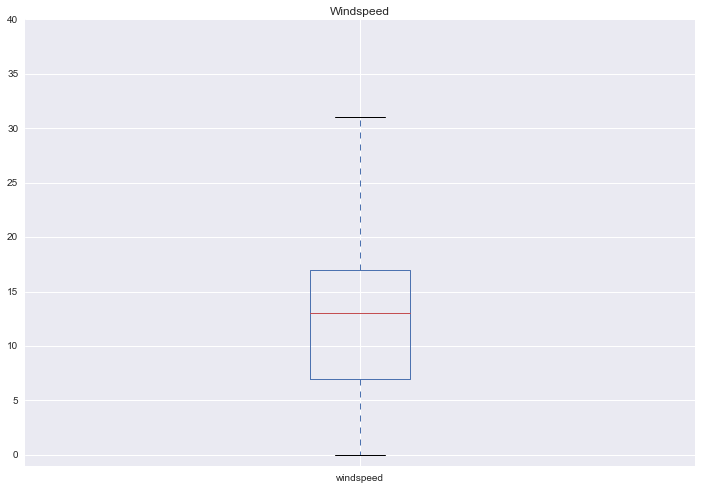

In [436]:
plt.figure(figsize=(12, 8))
plt.title('Windspeed')
train.windspeed.plot(kind='box')
plt.ylim((-1, 40))

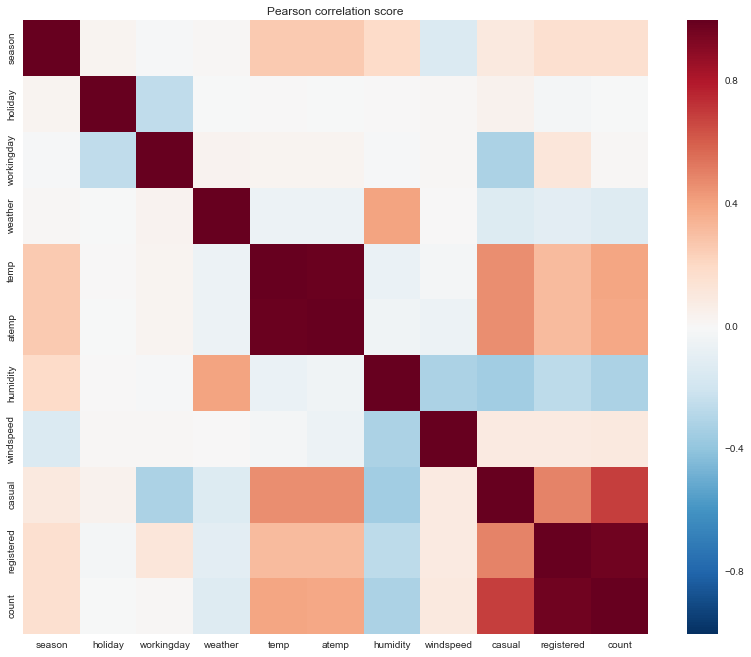

In [437]:
plt.figure(figsize=(14, 11))
plt.title('Pearson correlation score')
sns.heatmap(train.corr())

In [438]:
def map_fmt(fmt):
    def _fmt(s):
        return datetime.strptime(s, fmt)
    return _fmt
formatter = map_fmt('%Y-%m-%d %H:%M:%S')

X = pd.concat([train, test])
X.datetime = X.datetime.map(formatter)
X['month'] = X.datetime.map(lambda x: x.month)
X['day'] = X.datetime.map(lambda x: x.day)
X['hour'] = X.datetime.map(lambda x: x.hour)
X = X.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
y = np.log1p(train[['casual', 'registered', 'count']])

X_train = X[:train.shape[0]]
X_test = X[train.shape[0]:]
X_train

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,month,day,hour
0,14.395,0,81,1,9.84,1,0.0000,0,1,1,0
1,13.635,0,80,1,9.02,1,0.0000,0,1,1,1
2,13.635,0,80,1,9.02,1,0.0000,0,1,1,2
3,14.395,0,75,1,9.84,1,0.0000,0,1,1,3
4,14.395,0,75,1,9.84,1,0.0000,0,1,1,4
5,12.880,0,75,1,9.84,2,6.0032,0,1,1,5
6,13.635,0,80,1,9.02,1,0.0000,0,1,1,6
7,12.880,0,86,1,8.20,1,0.0000,0,1,1,7
8,14.395,0,75,1,9.84,1,0.0000,0,1,1,8
9,17.425,0,76,1,13.12,1,0.0000,0,1,1,9


In [439]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y, test_size=0.2)

In [440]:
regressor_c = GradientBoostingRegressor(n_estimators=100, max_depth=6)
regressor_r = GradientBoostingRegressor(n_estimators=100, max_depth=6)

regressor_c.fit(X_train, y_train['casual'])
regressor_r.fit(X_train, y_train['registered'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [441]:
h1 = regressor_c.predict(X_cv)
h1 = np.expm1(h1)

h2 = regressor_r.predict(X_cv)
h2 = np.expm1(h2)

h = np.log1p(h1 + h2)
print(mean_squared_error(h, y_cv['count']))

0.123566960595


In [442]:
h1 = regressor_c.predict(X_test)
h1 = np.expm1(h1)

h2 = regressor_r.predict(X_test)
h2 = np.expm1(h2)

h_gbrt = np.round(h1 + h2).astype(int)
h_gbrt

array([ 13,   6,   3, ..., 124, 103,  59])

In [443]:
regressor_c = RandomForestRegressor(n_estimators=1000, min_samples_split=11)
regressor_r = RandomForestRegressor(n_estimators=1000, min_samples_split=11)

regressor_c.fit(X_train, y_train['casual'])
regressor_r.fit(X_train, y_train['registered'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=11, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [444]:
h1 = regressor_c.predict(X_cv)
h1 = np.expm1(h1)

h2 = regressor_r.predict(X_cv)
h2 = np.expm1(h2)

h = np.log1p(h1 + h2)
print(mean_squared_error(h, y_cv['count']))

0.144325169429


In [445]:
h1 = regressor_c.predict(X_test)
h1 = np.expm1(h1)

h2 = regressor_r.predict(X_test)
h2 = np.expm1(h2)

h_rf = np.round(h1 + h2).astype(int)
h_rf

array([ 12,   6,   4, ..., 118,  91,  59])

In [446]:
h = np.round((h_rf + h_gbrt) / 2).astype(int)
h

array([ 12,   6,   4, ..., 121,  97,  59])

In [447]:
ans = pd.DataFrame({'datetime': test.datetime, 'count': h_rf})[['datetime', 'count']]
ans.to_csv('data/submit.csv', index=False)
ans

,datetime,count
0,2011-01-20 00:00:00,12
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,4
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3
5,2011-01-20 05:00:00,14
6,2011-01-20 06:00:00,45
7,2011-01-20 07:00:00,142
8,2011-01-20 08:00:00,282
9,2011-01-20 09:00:00,155
